# Лабораторная работа №2
# 6132 Курицын Никита

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

1. Считать цветное rgb изображение

In [2]:
ORIGINAL_image = cv2.imread("ph_1.jpg") #загрузка оригинального изображения
RGB_image = cv2.cvtColor(ORIGINAL_image, cv2.COLOR_BGR2RGB)

In [3]:
def display_2Images(image_1: np.ndarray,names_image_1: str, image_2: np.ndarray,names_image_2: str):
     fig_1, axes_1 = plt.subplots(1, 2, figsize=(12, 5))
     axes_1[0].imshow(image_1)
     axes_1[0].set_title(names_image_1)
     axes_1[0].axis('off')
    
     axes_1[1].imshow(image_2)
     axes_1[1].set_title(names_image_2)
     axes_1[1].axis('off')

In [4]:
def display_3Images(image_1: np.ndarray,names_image_1: str, image_2: np.ndarray,names_image_2: str, image_3: np.ndarray,names_image_3: str):
     fig_1, axes_1 = plt.subplots(1, 3, figsize=(12, 5))
     axes_1[0].imshow(image_1)
     axes_1[0].set_title(names_image_1)
     axes_1[0].axis('off')
    
     axes_1[1].imshow(image_2)
     axes_1[1].set_title(names_image_2)
     axes_1[1].axis('off')

     axes_1[2].imshow(image_3)
     axes_1[2].set_title(names_image_3)
     axes_1[2].axis('off')

2. Зашумить изображение аддитивным шумом с вероятностью p (по вариантам).  
    Вход: изображение из пункта 1  
    Вывод: зашумленное изображение

In [5]:
def add_noise(trueImage: np.ndarray ,p: np.float16):
    trueImage = trueImage.astype(np.float64)
    noiseImage = np.copy(trueImage)
    row, col, ch = RGB_image.shape
    mask = np.random.choice([0, 1], size=(row, col, ch), p=[1-p, p])
    gauss = np.random.normal(0, 220, (row, col, ch))
    noiseImage += mask*gauss
    noiseImage = np.clip(noiseImage, 0, 255)
    noiseImage = np.uint8(noiseImage)
    return noiseImage

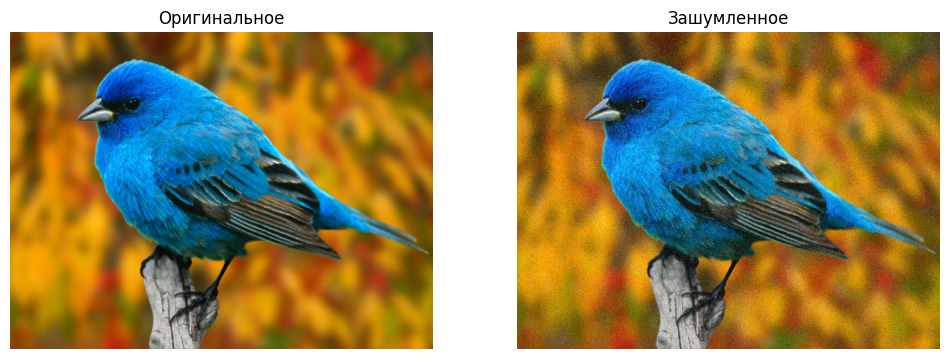

In [6]:
NOISE_image = add_noise(RGB_image, 0.12)
display_2Images(RGB_image,"Оригинальное", NOISE_image, "Зашумленное")

3. Написать функцию реализации ранговой фильтрации
Функцию вида fun(Image, window, rank)
Где window - окно фильтрации (по вариантам)
rank - опциональный параметр, значение ранга в ранговой фильтрации

In [7]:
def my_fun(noiseImage: np.ndarray,  rank: int, window = np.array([[0,1,0],[1,1,1],[0,1,0]])):
    
    filteredImage = np.zeros_like(noiseImage,dtype =np.uint8)
    window_size = int(len(window)/2)
    
    window = window.flatten()
    for p in range(filteredImage.shape[2]):
        padded_noiseImage = np.pad(noiseImage[:,:,p], window_size, mode='symmetric')
        for i in range(filteredImage.shape[0]):
            for j in range(filteredImage.shape[1]):
                    full_screen = padded_noiseImage[i - window_size + 1:i + window_size + 2, j - window_size + 1:j + window_size + 2].flatten()
                    array_screen = []
                    for l in range(len(full_screen)):
                       for q in range(window[l]):
                                array_screen.append(full_screen[l])
                    array_screen = np.sort(np.array(array_screen))
                    filteredImage[i,j,p] = array_screen[rank]
    return filteredImage
          
            

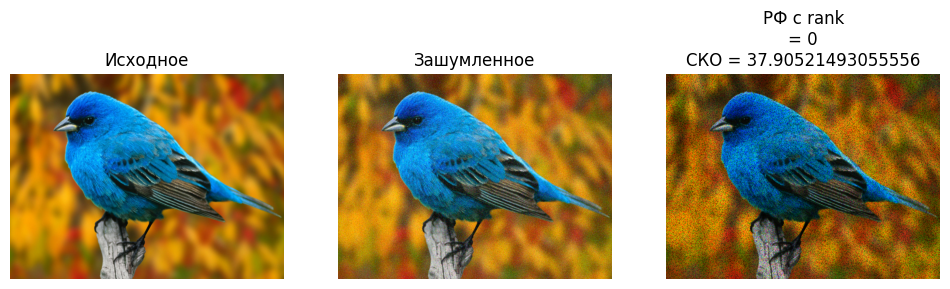

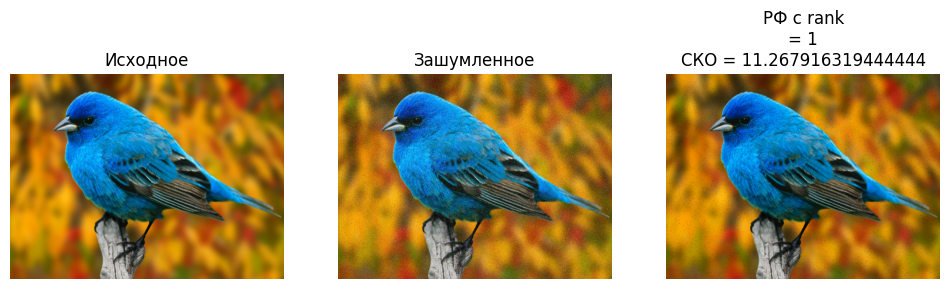

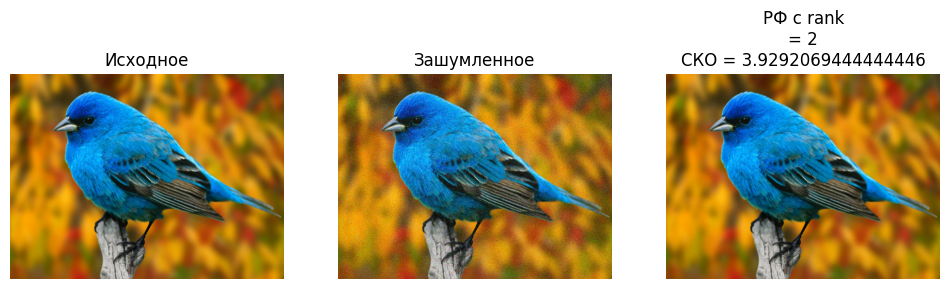

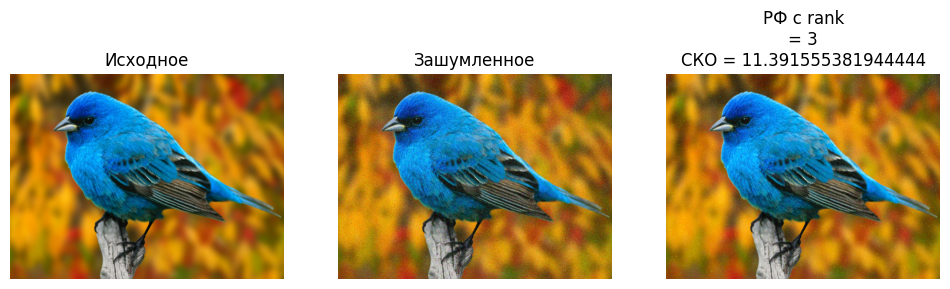

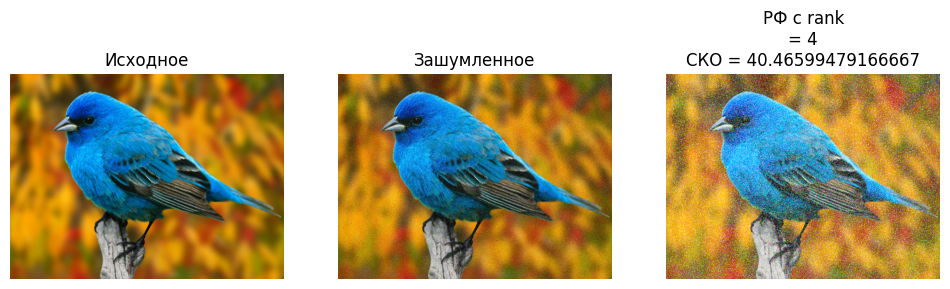

In [69]:
win = np.array([[0,1,0],[1,1,1],[0,1,0]])
for i in range(np.sum(win)):
    new_image = my_fun(NOISE_image, i,win)
    mse = np.mean((RGB_image - new_image)**2)
    display_3Images(RGB_image, "Исходное", NOISE_image, "Зашумленное", new_image,f"РФ с rank\n= {i}\nСКО = {mse}", )

5. Написать функцию реализации свертки
Функцию вида fun(mat1, mat2)
Где mat1 - первый сигнал. В данном случае изображение
mat2 - второй сигнал. В данном ядро КИХ фильтра

In [16]:
def func_Conv(mat1, mat2):
    filteredImage = np.zeros_like(mat1,dtype =np.uint8)
    window_size = int(len(mat2)/2)
    
    window = np.flipud(np.fliplr(mat2)).flatten()
    print(window)
    for p in range(filteredImage.shape[2]):
        padded_noiseImage = np.pad(mat1[:,:,p], window_size, mode='constant', constant_values=0)
        for i in range(filteredImage.shape[0]):
            for j in range(filteredImage.shape[1]):
                    full_screen = padded_noiseImage[i - window_size + 1:i + window_size + 2, j - window_size + 1:j + window_size + 2].flatten()
                    filteredImage[i,j,p] = np.sum(full_screen * window)      
    return filteredImage

6. Отфильтровать изображение КИХ фильтром с ядром заданным по вариантам. Подсчитать СКО. Сравнить с результатами пункта 4.
Вход: изображение из пункта 2
Вывод: Значения СКО . Исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованное изображение.
СКО считать между отфильтрованным изображением и исходным (не зашумленным) из пункта 1

[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]


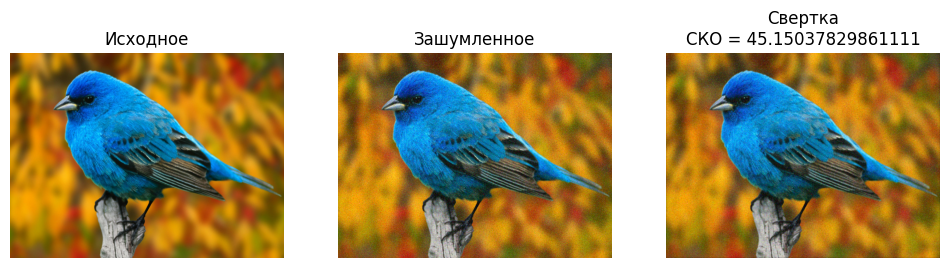

In [17]:
filter =   (1/5)*np.array([[1,0,1],[0,1,0],[1,0,1]])
CONV_image = func_Conv(NOISE_image,filter)
CONV_mse = np.mean((RGB_image - CONV_image)**2)
display_3Images(RGB_image, "Исходное", NOISE_image, "Зашумленное", CONV_image,f"Свертка\nСКО = {CONV_mse}" )